In [ ]:
import numpy as np
from scipy.signal import ss2tf, TransferFunction, bode, step
import matplotlib.pyplot as plt
# Definir parâmetros da matriz
J1 = 1.6 * (10**6)  # Momento de inércia 1
J2 = 3 * (10**3)  # Momento de inércia 2
J3 = 35 * (10**3)  # Momento de inércia 3
g = 1 * (10**3)  # Momento de inércia adicional
b12 = 1 * (10**6) # Amortecimento entre 1 e 2
b23 = 1 * (10**6) # Amortecimento entre 2 e 3
k12 = 60 * (10**5) # Rigidez entre 1 e 2
k23 = 60 * (10**5) # Rigidez entre 2 e 3
mu = 1 * (10**6)   # Coeficiente não linear
# Definindo a entrada como função crescente


# Definir a matriz A
A = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [-k12/J1, k12/J1, 0, -mu/J1, mu/J1, 0],
    [k12/(J2 + g), -(k12 + k23)/(J2 + g), k23/(J2 + g), mu/(J2 + g), -(mu + b23)/(J2 + g), (mu+b23)/(J2 + g)],
    [0, k23/J3, -k23/J3, 0, b23/J3, -b23/J3]
])

# Matriz B (entrada)
B = np.array([
    [0],
    [0],
    [0],
    [1/J1],
    [0],
    [0]
])

# Matriz C (saída)
C = np.array([[0, 0, 0, 0, 0, 1]])

# Matriz D (alimentação direta)
D = np.array([[0]])

# Calcular a função de transferência
numerator, denominator = ss2tf(A, B, C, D)

print("Numerador da função de transferência:", numerator)
print("Denominador da função de transferência:", denominator)


Numerador da função de transferência: [[ 0.00000000e+00  2.27373675e-13 -2.72848411e-12  4.46428566e-03
   5.35714288e-02  1.60714286e-01  3.35182675e-10]]
Denominador da função de transferência: [ 1.00000000e+00  5.29196429e+02  3.34928571e+03  4.04821429e+04
  2.09839286e+05 -1.60714286e+05  2.03906523e-09]


Polos do sistema: [-5.22938249e+02+0.j         -4.55044224e-01+8.69614657j
 -4.55044224e-01-8.69614657j -6.02119204e+00+0.j
  6.73101201e-01+0.j          1.26875170e-14+0.j        ]
Zeros do sistema: [ 1.20000000e+01+140121.86152061j  1.20000000e+01-140121.86152061j
 -6.00068299e+00     +0.j         -5.99931709e+00     +0.j
 -2.08558108e-09     +0.j        ]


/usr/local/lib/python3.10/dist-packages/scipy/signal/_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


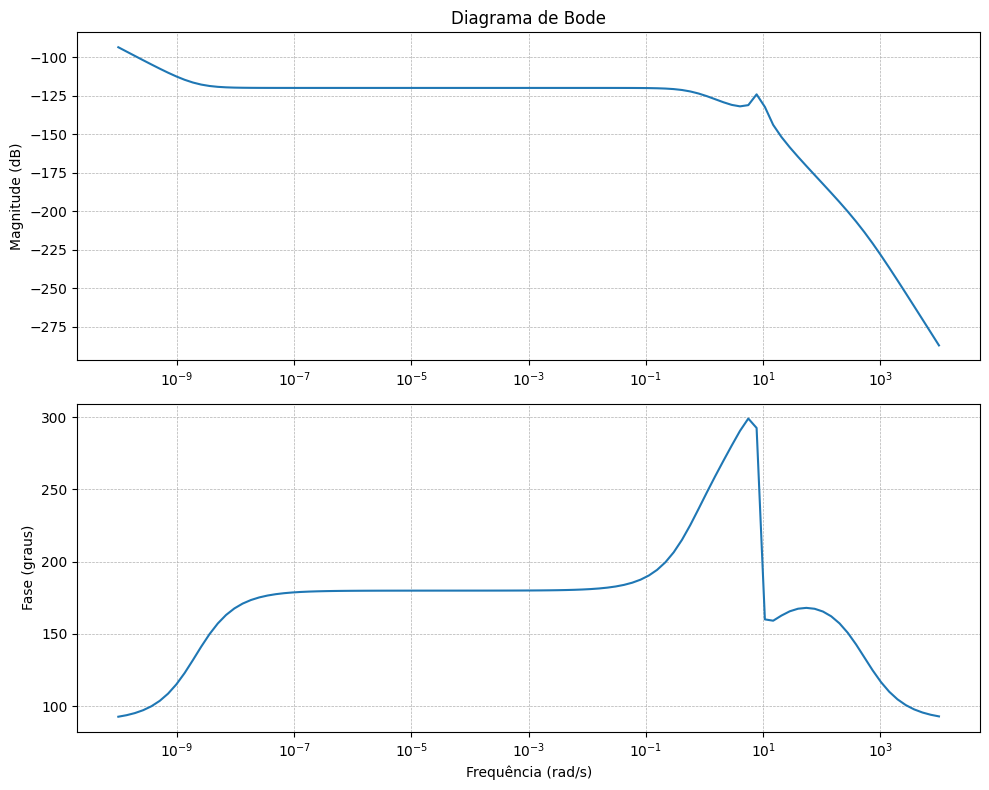

In [ ]:
system_tf = TransferFunction(numerator, denominator)
poles = np.roots(denominator)
print("Polos do sistema:", poles)
zeros = np.array(numerator[0])
zeros1 = np.roots(zeros)
print("Zeros do sistema:", zeros1)

# Gerar o diagrama de Bode
w, mag, phase = bode(system_tf)

# Plotar o diagrama de Bode
plt.figure(figsize=(10, 8))

# Magnitude
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title("Diagrama de Bode")
plt.ylabel("Magnitude (dB)")
plt.grid(which="both", linestyle="--", linewidth=0.5)

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.ylabel("Fase (graus)")
plt.xlabel("Frequência (rad/s)")
plt.grid(which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

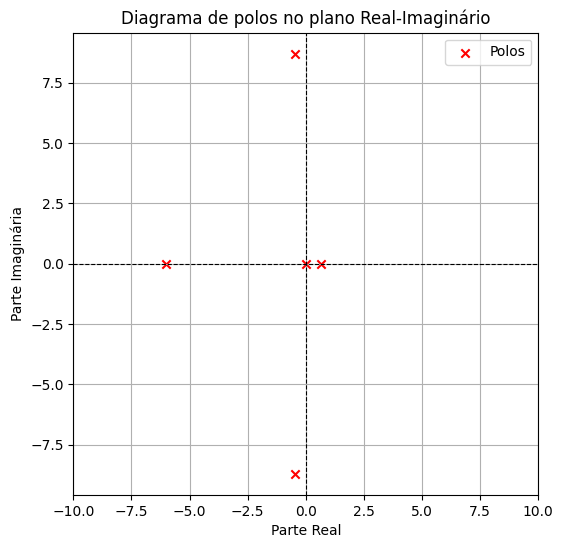

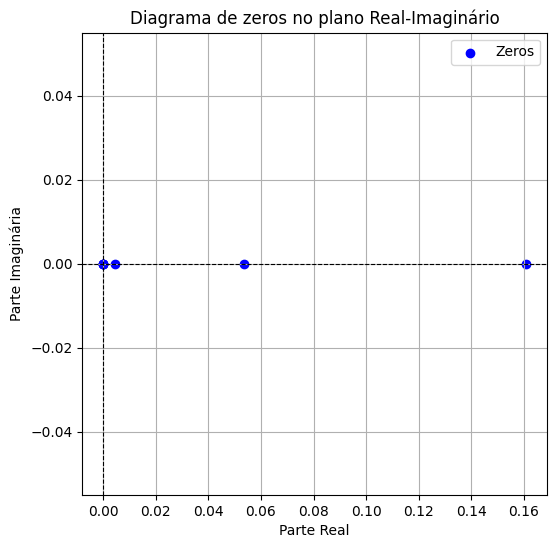

In [ ]:
# Traçar o plano real-imaginário (pólos)
plt.figure(figsize=(6, 6))
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Diagrama de polos no plano Real-Imaginário')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid()
plt.legend()
plt.xlim(-10, 10)  # Aqui você define o intervalo do eixo x que deseja mostrar (por exemplo, de -10 a 10)
plt.show()

#zeros
plt.figure(figsize=(6, 6))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Diagrama de zeros no plano Real-Imaginário')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid()
plt.legend()
plt.show()




**USANDO A BIBLIOTECA DE CONTROLE**

In [ ]:
%pip install control
import control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 9.8 MB/s eta 0:00:00


In [ ]:
sys1 = control.ss2tf(A, B, C, D)
print(sys1)
T, yout = control.step_response(sys1, T=np.linspace(0, 10000, 100000))
yout = 1000 * yout
# plt.figure(figsize=(10, 5))
# # plt.plot(T, yout, label='Resposta ao Degrau')
# plt.title('Resposta ao Degrau')
# plt.xlabel('Tempo (s)')
# plt.ylabel('Amplitude')
# # plt.xlim(0, 10000)
# # plt.ylim(0, 0.1)
# plt.grid()
# plt.legend()
# # plt.show()


<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 2.274e-13 s^5 - 2.728e-12 s^4 + 0.004464 s^3 + 0.05357 s^2 + 0.1607 s + 3.352e-10
------------------------------------------------------------------------------------
s^6 + 529.2 s^5 + 3349 s^4 + 4.048e+04 s^3 + 2.098e+05 s^2 - 1.607e+05 s + 2.039e-09



/usr/local/lib/python3.10/dist-packages/control/timeresp.py:1197: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
/usr/local/lib/python3.10/dist-packages/control/timeresp.py:1197: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
<ipython-input-5-17557087b7c2>:4: RuntimeWarning: overflow encountered in multiply
  yout = 1000 * yout


In [ ]:


# Definição da função de transferência (exemplo)
sys1 = control.ss2tf(A, B, C, D)

# Definir o valor do degrau
degrau_value = 1000000

# Definir o tempo de simulação
T = np.linspace(0, 5, 100000)

# Gerar o sinal de entrada (degrau com valor 10000)
u = degrau_value * np.ones_like(T)

# Simular a resposta ao degrau com valor diferente de 1
T, yout = control.forced_response(sys1, T=T, U=(0.7*10**7)*t)

# Plotar a resposta
plt.figure(figsize=(10, 5))
plt.plot(T, yout, label=f'Resposta ao Degrau ({degrau_value})')
plt.title('Resposta ao degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rad/s)')
plt.grid()
plt.show()


NameError: name 't' is not defined

**SIMULAÇÃO NÃO LINEAR**

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definindo os parâmetros do sistema
J1 = 1.6 * (10**6)  # Momento de inércia 1
J2 = 3 * (10**3)  # Momento de inércia 2
J3 = 35 * (10**3)  # Momento de inércia 3
g = 1 * (10**3)  # Momento de inércia adicional
b12 = 1 * (10**6) # Amortecimento entre 1 e 2
b23 = 1 * (10**6) # Amortecimento entre 2 e 3
k12 = 60 * (10**5) # Rigidez entre 1 e 2
k23 = 60 * (10**5) # Rigidez entre 2 e 3
mu = 1 * (10**6)   # Coeficiente não linear
# Definindo a entrada como função crescentete

# Definindo as equações do sistema
def system(t, y):
    theta1, theta2, theta3, omega1, omega2, omega3 = y

    # Dinâmica de cada equação
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    dtheta3_dt = omega3

    domega1_dt = (1*10**7 - (mu * (1 - (theta1 - theta2) ** 2)) * (omega1 - omega2) - k12 * (theta1 - theta2)) / J1
    domega2_dt = (
        (- mu * (1 - (theta2 - theta1) ** 2)) * (omega2 - omega1)
        - b23 * (omega2 - omega3)
        - k12 * (theta2 - theta1)
        - k23 * (theta2 - theta3)
    ) / (J2+Jg)
    domega3_dt = (-b23 * (omega3 - omega2) - k23 * (theta3 - theta2)) / J3

    return [dtheta1_dt, dtheta2_dt, dtheta3_dt, domega1_dt, domega2_dt, domega3_dt]

# Condições iniciais
theta1_0 = 0
theta2_0 = 0
theta3_0 = 0
omega1_0 = 0
omega2_0 = 0.0
omega3_0 = 0.0

# Vetor de condições iniciais
y0 = [theta1_0, theta2_0, theta3_0, omega1_0, omega2_0, omega3_0]

# Intervalo de tempo
t_span = (0, 5)  # de 0 a 10 segundos
t_eval = np.linspace(t_span[0], t_span[1], 100000)  # Pontos para avaliação

# Resolvendo o sistema
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method="RK45")

# Extraindo resultados
t = sol.t
omega3= sol.y[5]
theta3 = sol.y[2]

# Plotando os resultados
plt.figure(figsize=(10, 6))
# plt.plot(t, theta1, label="Theta 1 (Entrada)")
# plt.plot(t, theta2, label="Theta 2 (Resposta)")
plt.plot(t, theta3, label="Velocidade Angular (Resposta)")
plt.xlabel("Tempo (s)")
plt.ylabel("Posição angular (rad)")
plt.title("Resposta a um degrau unitário")
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definindo os parâmetros do sistema
J1 = 1.6 * (10**6)  # Momento de inércia 1
J2 = 3 * (10**3)  # Momento de inércia 2
J3 = 35 * (10**3)  # Momento de inércia 3
g = 1 * (10**3)  # Momento de inércia adicional
b12 = 1 * (10**6) # Amortecimento entre 1 e 2
b23 = 1 * (10**6) # Amortecimento entre 2 e 3
k12 = 60 * (10**5) # Rigidez entre 1 e 2
k23 = 60 * (10**5) # Rigidez entre 2 e 3
mu = 1 * (10**6)   # Coeficiente não linear
# Definindo a entrada como função crescente

# Definindo a entrada como uma função rampa
def input_ramp(t, alpha=100):
    return alpha * t

# Definindo as equações do sistema
def system(t, y):
    theta1, theta2, theta3, omega1, omega2, omega3 = y

    # Entrada rampa (aplicando a função de entrada)
    u = input_ramp(t)

    # Dinâmica de cada equação
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    dtheta3_dt = omega3

    domega1_dt = (1- (mu * (1 - (theta1 - theta2) ** 2)) * (omega1 - omega2) - k12 * (theta1 - theta2)) / J1
    domega2_dt = (
        (- mu * (1 - (theta2 - theta1) ** 2)) * (omega2 - omega1)
        - b23 * (omega2 - omega3)
        - k12 * (theta2 - theta1)
        - k23 * (theta2 - theta3)
    ) / (J2+Jg)
    domega3_dt = (-b23 * (omega3 - omega2) - k23 * (theta3 - theta2)) / J3

    return [dtheta1_dt, dtheta2_dt, dtheta3_dt, domega1_dt, domega2_dt, domega3_dt]

# Condições iniciais
theta1_0 = 0
theta2_0 = 0
theta3_0 = 0
omega1_0 = 0
omega2_0 = 0
omega3_0 = 0

# Vetor de condições iniciais
y0 = [theta1_0, theta2_0, theta3_0, omega1_0, omega2_0, omega3_0]

# Intervalo de tempo
t_span = (0, 5)  # de 0 a 10 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Pontos para avaliação

# Resolvendo o sistema
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method="RK45")

# Extraindo resultados
t = sol.t
omega3 = sol.y[5]
theta3 = sol.y[2]

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(t, theta3, label="Velocidade angular (rad/s)")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade angular (rad/s)")
plt.title("Resposta a uma entrada em degrau")
plt.grid()
plt.show()
